In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from scipy import ndimage

# Read the image
image = cv2.imread('parrot.jpg', cv2.IMREAD_GRAYSCALE)

For **Sobel edge detection**, the kernels used to compute gradients along the x and y directions are:

1. **Sobel X Kernel** (detects horizontal edges):
   ```
   [-1  0  1]
   [-2  0  2]
   [-1  0  1]
   ```

2. **Sobel Y Kernel** (detects vertical edges):
   ```
   [-1 -2 -1]
   [ 0  0  0]
   [ 1  2  1]
   ```

In [14]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel along x-axis
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel along y-axis
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

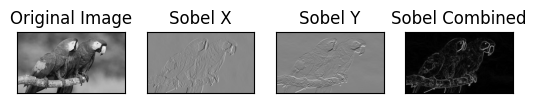

In [15]:
# Display the results
titles = ['Original Image', 'Sobel X', 'Sobel Y', 'Sobel Combined']
images = [image, sobel_x, sobel_y, sobel_combined]

for i in range(4):
    plt.subplot(1, 4, i + 1), plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


**Canny edge detection** does not rely on fixed convolution kernels like Sobel. Instead, it involves a sequence of steps to calculate edges:

1. Gaussian Blur Kernel

2. Gradient Calculation

3. Non-Maximum Suppression

4. Double-Thresholding


(([], []), ([], []))

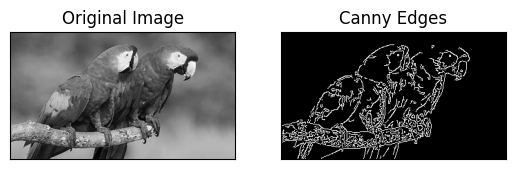

In [16]:
# Canny Edge Detection
edges_canny = cv2.Canny(image, 100, 200)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edges')
plt.xticks([]), plt.yticks([])

**Prewitt edge detection** is another gradient-based method to detect edges in an image.

1. **Prewitt X Kernel** (detects horizontal edges):
   ```
   [-1  0  1]
   [-1  0  1]
   [-1  0  1]
   ```

2. **Prewitt Y Kernel** (detects vertical edges):
   ```
   [-1 -1 -1]
   [ 0  0  0]
   [ 1  1  1]
   ```

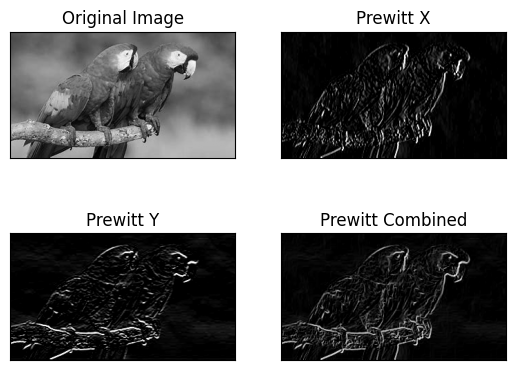

In [17]:
# Define Prewitt kernels
prewitt_x_kernel = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]])
prewitt_y_kernel = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]])

# Apply Prewitt X and Y kernels
prewitt_x = cv2.filter2D(image, -1, prewitt_x_kernel)
prewitt_y = cv2.filter2D(image, -1, prewitt_y_kernel)

# Combine gradients (magnitude)
prewitt_combined = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))

# Display the results
titles = ['Original Image', 'Prewitt X', 'Prewitt Y', 'Prewitt Combined']
images = [image, prewitt_x, prewitt_y, prewitt_combined]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


**Laplacian Edge Detection:**
The Laplacian operator detects edges in an image by highlighting regions of rapid intensity change using a second-order derivative.

### Kernel:
```plaintext
0   1   0
1  -4   1
0   1   0
```

In [26]:
# Define the Laplacian filter
def laplacian_filter(img, alpha=0.05):
    kernel = np.array([[0, 1, 0], [1, -4 + alpha, 1], [0, 1, 0]])
    #parameter alpha to adjust the intensity of the central weight.
    #This allows for customizing how the kernel responds to edges and gradients in the image.
    return convolve(img, kernel)

(-0.5, 326.5, 183.5, -0.5)

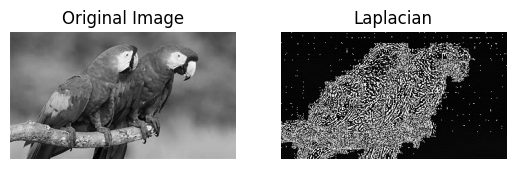

In [23]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')
plt.axis('off')

# Convert to grayscale
g = image

# Apply Laplacian filter
f = laplacian_filter(g, alpha=0.05)

# Display the Laplacian filtered image
plt.subplot(1, 2, 2)
plt.imshow(f, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

**Robert Edge Detection:** The Roberts operator is an edge detection technique that uses a pair of 2x2 kernels to approximate the gradient of an image, detecting edges at 45° angles.

### Kernels:
```plaintext
Gx = [1  0]    Gy = [ 0  1]
     [0 -1]         [-1  0]
```

(-0.5, 326.5, 183.5, -0.5)

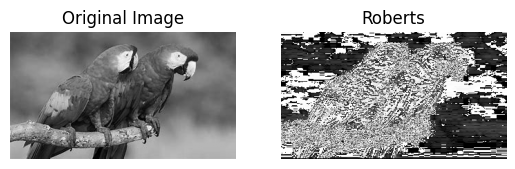

In [25]:
# Apply Roberts edge detection
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
rx = convolve(g, kernelx)
ry = convolve(g, kernely)
r = np.sqrt(rx*2 + ry*2)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')
plt.axis('off')

# Display the Roberts edge detected image
plt.subplot(1, 2, 2)
plt.imshow(r, cmap='gray')
plt.title('Roberts')
plt.axis('off')